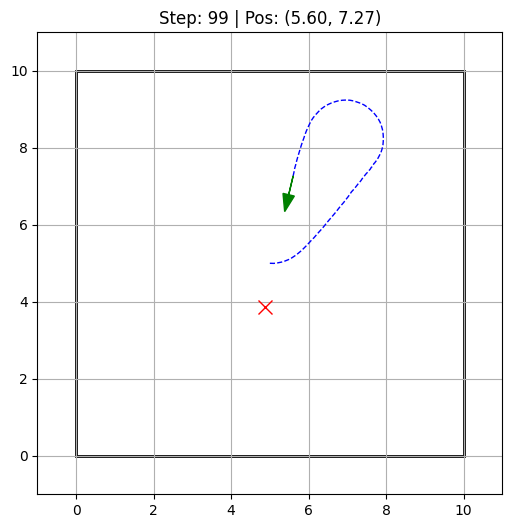

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import display, clear_output  # Import needed for notebook animation

class UnicycleRobot:
    def __init__(self, start_state, tau):
        # State: [x1, x2, x3] -> [x, y, theta]
        self.state = np.array(start_state, dtype=float)
        self.tau = tau
        self.path_x = [self.state[0]]
        self.path_y = [self.state[1]]
        
        # Constraints definition
        self.X_lim = [0, 10]
        self.Y_lim = [0, 10]
        self.U1_lim = [0.25, 1.0] # Linear velocity (cannot stop!)
        self.U2_lim = [-1.0, 1.0] # Angular velocity
        self.W_lim =  [-0.05, 0.05] # Disturbance bounds

    def normalize_angle(self, angle):
        """ Wraps angle to [-pi, pi] """
        return (angle + np.pi) % (2 * np.pi) - np.pi

    def step(self, u_command):
        x1, x2, x3 = self.state

        # 1. Enforce Input Constraints (Clamping)
        u1 = np.clip(u_command[0], self.U1_lim[0], self.U1_lim[1])
        u2 = np.clip(u_command[1], self.U2_lim[0], self.U2_lim[1])

        # 2. Generate Random Disturbances (w)
        w = np.random.uniform(self.W_lim[0], self.W_lim[1], size=3)

        # 3. System Dynamics
        x1_next = x1 + self.tau * (u1 * np.cos(x3) + w[0])
        x2_next = x2 + self.tau * (u1 * np.sin(x3) + w[1])
        x3_next = x3 + self.tau * (u2 + w[2])
        x3_next = self.normalize_angle(x3_next)

        # Update internal state
        self.state = np.array([x1_next, x2_next, x3_next])
        self.path_x.append(x1_next)
        self.path_y.append(x2_next)

    def check_constraints(self):
        x, y, _ = self.state
        if (x < self.X_lim[0] or x > self.X_lim[1] or 
            y < self.Y_lim[0] or y > self.Y_lim[1]):
            return False
        return True

def run_simulation():
    # Simulation Parameters
    TAU = 0.1          
    STEPS = 100        # Reduced steps slightly for smoother notebook performance
    
    robot = UnicycleRobot(start_state=[5.0, 5.0, 0.0], tau=TAU)
    target = np.array([8.0, 8.0])

    # Create the figure once
    fig, ax = plt.subplots(figsize=(6, 6))

    for k in range(STEPS):
        # --- CONTROLLER LOGIC ---
        dx = target[0] - robot.state[0]
        dy = target[1] - robot.state[1]
        dist = np.sqrt(dx**2 + dy**2)
        desired_theta = np.arctan2(dy, dx)
        angle_error = robot.normalize_angle(desired_theta - robot.state[2])
        
        cmd_velocity = 0.5 * dist 
        cmd_turn = 2.0 * angle_error
        
        robot.step([cmd_velocity, cmd_turn])

        # --- VISUALIZATION ---
        # 1. Clear the Output of the cell (Critical for Notebooks)
        clear_output(wait=True)
        
        # 2. Clear the Axis
        ax.clear()
        
        # 3. Re-draw everything
        rect = patches.Rectangle((0,0), 10, 10, linewidth=2, edgecolor='black', facecolor='none')
        ax.add_patch(rect)
        ax.plot(target[0], target[1], 'rx', markersize=10, label='Target')
        ax.plot(robot.path_x, robot.path_y, 'b--', linewidth=1, label='Path')
        
        arrow_len = 0.5
        ax.arrow(robot.state[0], robot.state[1], 
                 arrow_len * np.cos(robot.state[2]), 
                 arrow_len * np.sin(robot.state[2]), 
                 head_width=0.3, color='g', zorder=5)
        
        ax.set_xlim(-1, 11)
        ax.set_ylim(-1, 11)
        ax.set_title(f"Step: {k} | Pos: ({robot.state[0]:.2f}, {robot.state[1]:.2f})")
        ax.grid(True)
        
        # 4. Display the updated plot
        display(fig)
        
        # Check Collision
        if not robot.check_constraints():
            print(f"CRASH! Robot hit the wall at step {k}")
            break
        
        if dist < 0.5:
            target = np.random.uniform(1, 9, size=2)

    plt.close() # Close the final plot object to avoid double printing

if __name__ == "__main__":
    run_simulation()

In [2]:
"e"

'e'